In [47]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score



In [48]:
silent = True
%run ../dataLoadAndPrepare.ipynb

# Regressionsproblem

### Ziel:
Vorhersage der kontinuierlichen numerischen Variable Preis

Zielvariable:
- price (int 326$-18823$)

Attribute nach welchen in Klassen zugeordnet wird:
Attribute nach welchen in Klassen zugeordnet wird:
- carat (float)
- cut (str)
- color (str)
- clarity (str)
- x (float)
- y (float)
- z (float)
- depth (float)
- table (int)


In [ ]:
# LabelEncoder für 'color' und 'clarity'
le_color = LabelEncoder()
le_clarity = LabelEncoder()
le_cut = LabelEncoder()

# Label Encoding anwenden
df['color'] = le_color.fit_transform(df['color'])
df['clarity'] = le_clarity.fit_transform(df['clarity'])
df['cut'] = le_cut.fit_transform(df['cut'])

# Zeige das Ergebnis
display(df.head())

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,True,False,False,False,False,False,False,True,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,True,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [50]:
# Zielvariable festlegen (price) und in y speichern
y = df['price']

print(f"\nDie Zielvariable 'price' enthält n verschiedenen Ausprägungen: {y.nunique()}")

# Inputdaten DataFrame erstellen
X = df.drop('price', axis=1)
print(f"\nInputdaten DataFrame: {X.shape[1]} Spalten und {X.shape[0]} Zeilen")
print(f"\nDie Inputdaten sehen wie folgt aus:")
{display(X.head())}


Die Zielvariable 'price' enthält n verschiedenen Ausprägungen: 11602

Inputdaten DataFrame: 26 Spalten und 53940 Zeilen

Die Inputdaten sehen wie folgt aus:


,carat,depth,table,x,y,z,color_D,color_E,color_F,color_G,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,3.95,3.98,2.43,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


{None}

In [51]:
# Aufteilung in Trainings- und Testdaten
# 80% der Daten werden für das Training verwendet, 20% für das Testen (zufällige Aufteilung)
# random_state wird auf 42 gesetzt, damit die Aufteilung reproduzierbar ist (immer die gleiche Aufteilung)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Random Forest Regressor Modell erstellen und trainieren
rf_reg_model = RandomForestRegressor(n_estimators=200, random_state=42)
print("Trainiere Random Forest Regressor Modell...")
rf_reg_model.fit(X_train, y_train)


Trainiere Random Forest Regressor Modell...


RandomForestRegressor(n_estimators=200, random_state=42)

In [53]:
# Vorhersagen machen
# Trainiertes Modell wird auf die Testdaten angewendet
y_predicted_test = rf_reg_model.predict(X_test)       # Basierend auf den Testdaten wird der cut vorhergesagt


# Berechne Metriken zur Modellbewertung
mae = mean_absolute_error(y_test, y_predicted_test)
rmse = root_mean_squared_error(y_test, y_predicted_test)
r2 = r2_score(y_test, y_predicted_test)

# Ausgabe der Metriken
print(f"Durchschnitt der Differenz zwischen tatsächlichen und vorhergesagten Werte (MAE): {mae}")
print(f"Standardabweichung (MSE): {rmse}")
print(f"R²: {r2}")



Durchschnitt der Differenz zwischen tatsächlichen und vorhergesagten Werte (MAE): 270.1427570913964
Standardabweichung (MSE): 549.7947459720216
R²: 0.9809852388651891


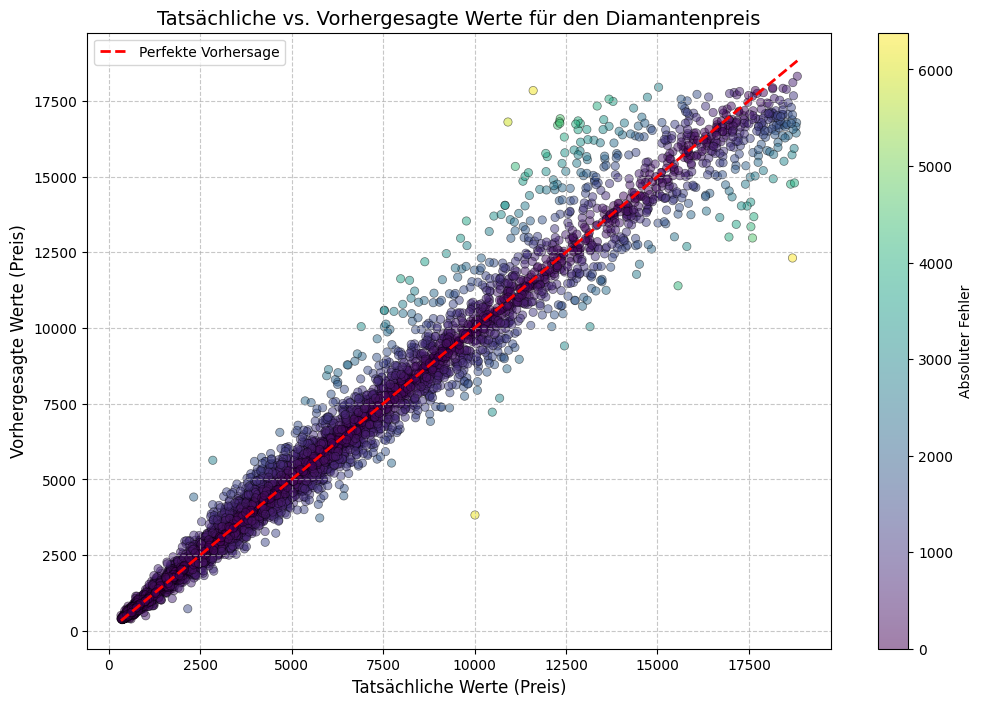

In [54]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_predicted_test, alpha=0.5, c=abs(y_test - y_predicted_test), 
            cmap='viridis', edgecolors='black', linewidth=0.5)
plt.colorbar(label='Absoluter Fehler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfekte Vorhersage')
plt.xlabel('Tatsächliche Werte (Preis)', fontsize=12)
plt.ylabel('Vorhergesagte Werte (Preis)', fontsize=12)
plt.title('Tatsächliche vs. Vorhergesagte Werte für den Diamantenpreis', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [55]:
import plotly.express as px
import plotly.graph_objs as go
import numpy as np

# Daten für den interaktiven Plot vorbereiten
hover_data = pd.DataFrame({
    'Tatsächlicher Preis': y_test,
    'Vorhergesagter Preis': y_predicted_test,
    'Absoluter Fehler': np.abs(y_test - y_predicted_test),
    'Relativer Fehler (%)': np.abs(y_test - y_predicted_test) / y_test * 100
})

# Zusätzliche Features für Hover-Informationen
# Angenommen, die ursprünglichen Features sind noch verfügbar
hover_data = pd.concat([hover_data, X_test.reset_index(drop=True)], axis=1)

# Interaktiver Scatter Plot mit Plotly
fig = px.scatter(
    hover_data, 
    x='Tatsächlicher Preis', 
    y='Vorhergesagter Preis',
    color='Absoluter Fehler',
    color_continuous_scale='viridis',
    hover_data={
        'Tatsächlicher Preis': ':.2f',
        'Vorhergesagter Preis': ':.2f', 
        'Absoluter Fehler': ':.2f',
        'Relativer Fehler (%)': ':.2f'
    },
    labels={
        'Tatsächlicher Preis': 'Tatsächlicher Preis ($)',
        'Vorhergesagter Preis': 'Vorhergesagter Preis ($)',
        'Absoluter Fehler': 'Absoluter Fehler ($)'
    },
    title='Interaktiver Scatter Plot: Tatsächliche vs. Vorhergesagte Diamantenpreise'
)

# Perfekte Vorhersage Linie hinzufügen
fig.add_trace(
    go.Scatter(
        x=[y_test.min(), y_test.max()], 
        y=[y_test.min(), y_test.max()],
        mode='lines',
        name='Perfekte linie',
        line=dict(color='red', dash='dash'),
        showlegend=False
    )
)

fig.update_layout(
    height=800,
    width=900,
    coloraxis_colorbar=dict(title='Absoluter Fehler ($)'),
    hovermode='closest'
)


# Optional: Plot direkt anzeigen (funktioniert in Jupyter Notebook)
fig.show()

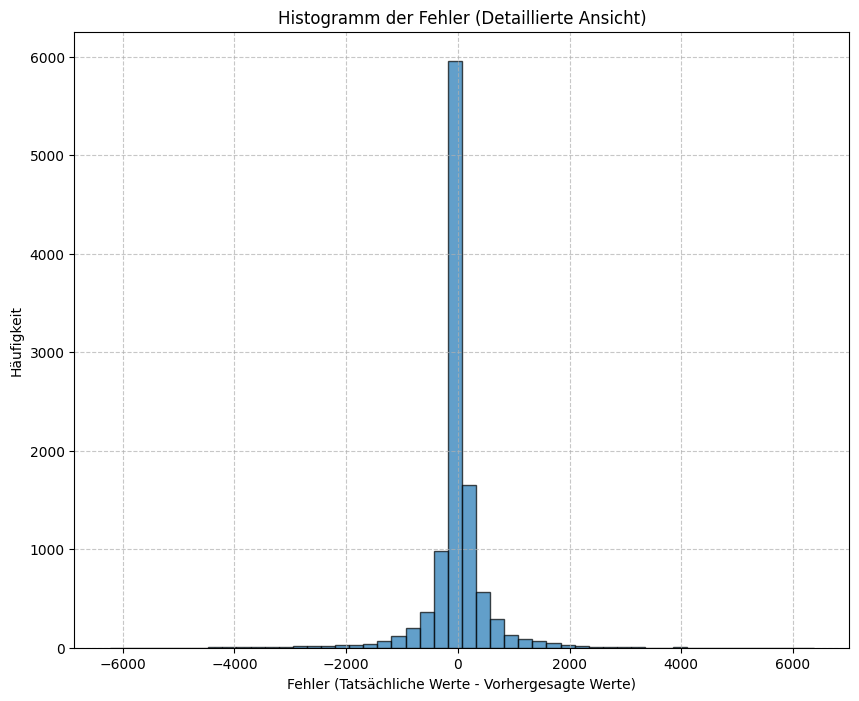

In [56]:
# Histogramm der Fehler mit höherer Auflösung
plt.figure(figsize=(10, 8))
plt.hist(y_test - y_predicted_test, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Fehler (Tatsächliche Werte - Vorhergesagte Werte)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Fehler (Detaillierte Ansicht)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Erklärung:

- positive Werte: der vorhergesagte Preis ist zu niedrig
- negative Werte: der vorhergesagte Preis ist zu hoch

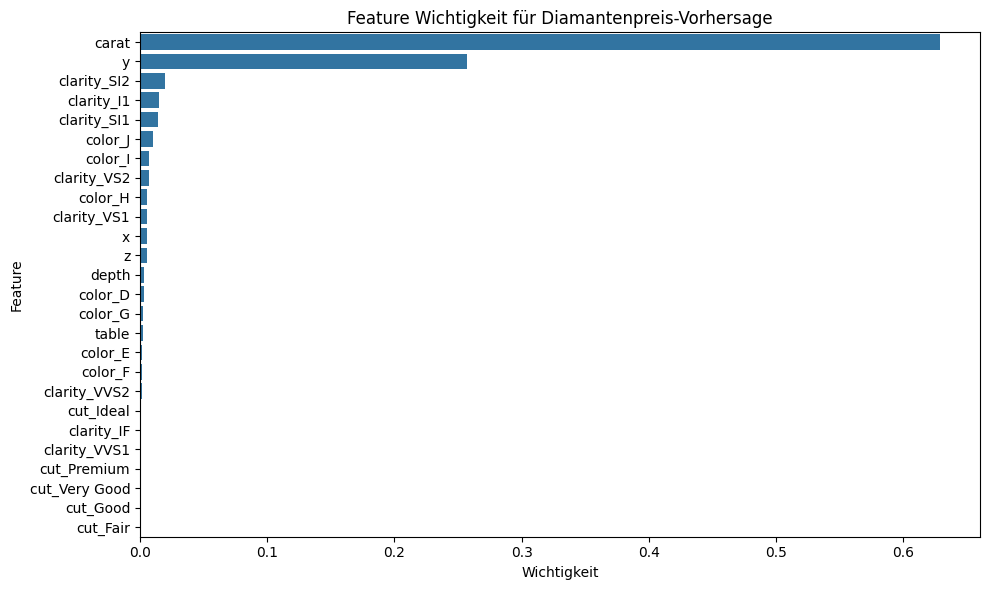

In [57]:
feature_importance = rf_reg_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'feature': feature_names, 
    'importance': feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Wichtigkeit für Diamantenpreis-Vorhersage')
plt.xlabel('Wichtigkeit')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()